# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [62]:
type(img)

numpy.ndarray

In [ ]:
img = cv2.imread('kodim01.png')

In [133]:
img = cv2.imread('italia.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = img.astype(float)

In [134]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img2, ksize=(5,5), sigmaX=5)

In [135]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = np.zeros_like(img2, dtype=np.float32)
diff = img2 - unsharp


In [151]:
amount = 1

In [152]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = img + diff * amount
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

(<Axes: >, <matplotlib.image.AxesImage at 0x2b03dd09cd0>)

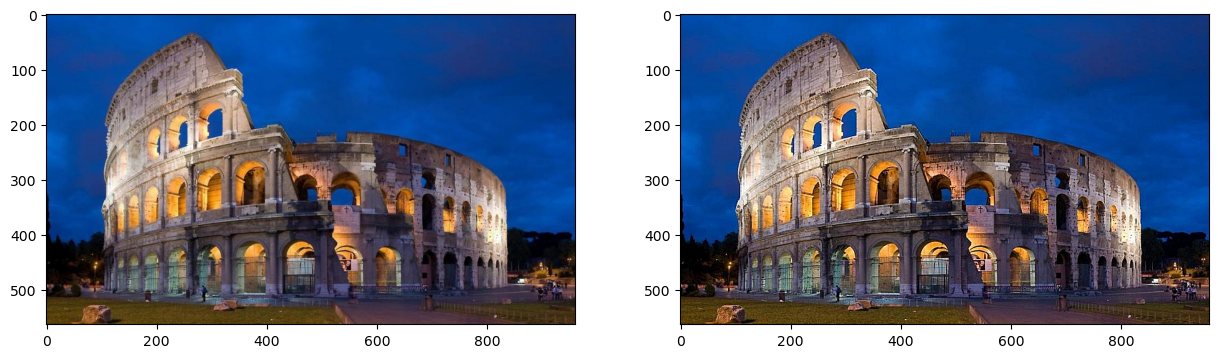

In [153]:
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(sharpened)

(<Axes: >, <matplotlib.image.AxesImage at 0x2b0440bf090>)

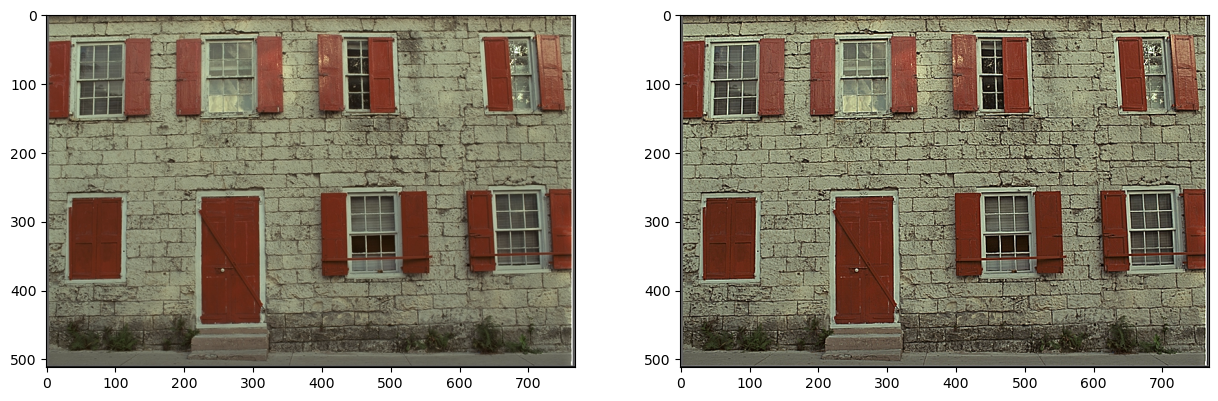

In [159]:
img = cv2.imread('kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = img.astype(float)
unsharp = cv2.GaussianBlur(img2, ksize=(5,5), sigmaX=5)
diff = np.zeros_like(img2, dtype=np.float32)
diff = img2 - unsharp
amount = 1
sharpened = img + diff * amount
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

1) In my case amount will be 1
2) if amount<0, we get a blurring effect more
   if amount>0 but  too small we will not see any effect
3) if amount will be too large we will artificially create more boundaries, spoiling input image
 